In [27]:
#Importing the required libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Load the train and test dataset in pandas Dataframe
train = pd.read_csv("C:/Users/zeus/Desktop/Big-Mart/bigmart_train.csv")
test = pd.read_csv("C:/Users/zeus/Desktop/Big-Mart/bigmart_test.csv")

In [29]:
#Checking number of rows and columns in train dataset
print(train.shape)
print(train.columns)
print(test.shape)
print(test.columns)

(8523, 12)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
(5681, 11)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [30]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index = True)

In [31]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
data.shape

(14204, 13)

In [33]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

We have 2439 nulls in Item_Weight, 4016 nulls in Outlet_Size, and 5681 nulls in Item_Outlet_Sales


In [34]:
#print the unique values in the Item_Fat_Content, Outlet_Establishment_Year.
print(data['Item_Fat_Content'].unique())
print(data['Outlet_Establishment_Year'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
[1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [37]:
#replace all other representation of low fat with Low Fat
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
#replace all representation of reg with Regular 
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')

In [38]:
#data after the typo errors were removed
print(data['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [41]:
#Printing the count value of Item_Fat_Content column
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [39]:
#Calculate the Outlet Age:
data['Outlet_Age'] = 2024-data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,15


Outlet_Size has missing values so we will find the most occuring element in Outlet_Size from the existing dataset and insert the same element into the missing cells.

In [40]:
#Unique values in the Outlet_Size
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [42]:
#printing the count value of Outlet_Size column
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [43]:
#missing values in Outlet_Size column
data['Outlet_Size'].isnull().sum()

4016

In [44]:
#use the mode function to find out the most common value in Outlet_Size
data['Outlet_Size'].mode()[0]
#This shows that Medium size is the most occuring value.

'Medium'

In [45]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data['Outlet_Size'].isnull().sum()
# now there is no null elements in Outlet_Size

0

Now we will insert the missing values into the Item_Weight column with the mean value of the Item_Weight.


In [50]:
#Total missing values in the Item_Weight column
data['Item_Weight'].isnull().sum()

2439

In [51]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
#Now there is no missing cell in the Item_Weight column
data['Item_Weight'].isnull().sum()

0

<Axes: >

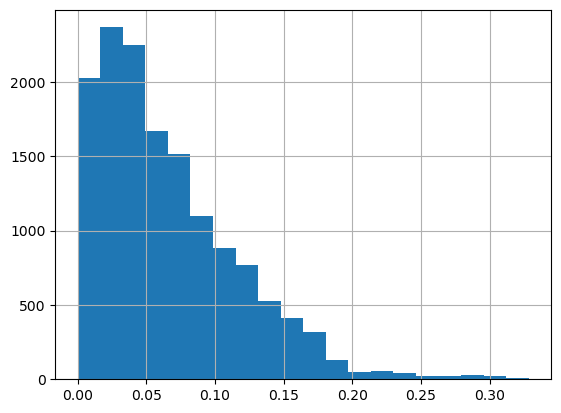

In [55]:
#plot a histogram to reveal the distribution of Item_Visibility column
data['Item_Visibility'].hist(bins=20)

In [67]:
#finding the 1st quartile, 3rd quartile and inter quartile range.
Q1 = data['Item_Visibility'].quantile(0.25)
Q3 = data['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1


In [69]:
#Remove the outliers from the data 
# The resulting data is stored in fill_data variable 
fill_data = data.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [74]:
fill_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,37


In [77]:
#Number of rows without outliers:
print(fill_data.shape)
#Number of rows with Outliers
print(data.shape)
#so there were roughly 261 Outliers in the dataset on the basis of Item_Visibility.

(13943, 14)
(14204, 14)


In [78]:
#Assign fill_data dataset to "data" DataFrame.
data = fill_data

In [79]:
#Modifying Item_Visibility by converting the numerical values into the categorical data(Low Visibility, Visibility, and High Visibility)
data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'],[0.000,0.065,0.13,0.2],labels= ['Low Visibility','Visibile','High Visibility'])

In [84]:
#print the count of item_visibility-bins
data['Item_Visibility_bins'].value_counts()

Item_Visibility_bins
Low Visibility     7363
Visibile           4283
High Visibility    1418
Name: count, dtype: int64

In [85]:
#Total number of null values in the Item_Visibility_bins
data['Item_Visibility_bins'].isnull().sum()

879

In [86]:
#Here the most occured element is Low Visibility
data['Item_Visibility_bins'].mode()[0]

'Low Visibility'

In [89]:
#replace null values with low visibility
data['Item_Visibility_bins'] = data['Item_Visibility_bins'].fillna('Low Visibility')

In [90]:
#No missing values are present.
data['Item_Visibility_bins'].isnull().sum()

0

Now we have cleaned the dataset and we have successfully removed the typos. How it is time to apply the models of machine learning.


In [91]:
#Code all categorical data as numeriacal data using LabelEncoder from sklearn's preprocessing module 
#Initialize the label encoder
le = LabelEncoder()

In [92]:
# Transform Item_Fat_Content
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

#Transform Item_Visibility_bins
data['Item_Visibility_bins'] = le.fit_transform(data['Item_Visibility_bins'])

#Transform Outlet_Size
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

#Transform Outlet_Location_Type
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [96]:
#Print the unique values of Outlet_Type
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [98]:
#Create dummies for Outlet_Type
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head(10)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False
5,False,False,True,False
6,False,True,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


In [100]:
#Explore the column Item_Identifier
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [101]:
#As there are multiple values of Food, nonconsumable items, and drinks with different numbers, combine the item type.
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD' : "Food", "NC":"Non-Consumable","DR":"Drink"})

In [102]:
#Only three categories are present in an Item_Type_Combined column
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              9991
Non-Consumable    2652
Drink             1300
Name: count, dtype: int64

In [105]:
#Perform one-hot encoding for all columns as the model works on numerical values and not on categorical values.
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [107]:
#Drop the columns which have been converted to different types.
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1,inplace=True)

In [108]:
#Divide the dataset created earlier into train and test datasets
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [109]:
#Drop unnecessary columns
test.drop(['Item_Outlet_Sales', 'source'], axis =1, inplace = True)
train.drop(['source'], axis = 1, inplace = True)

In [110]:
#Export modified versions of the files 
train.to_csv('C:/Users/zeus/Desktop/Big-Mart/train_modified.csv', index = False)
test.to_csv('C:/Users/zeus/Desktop/Big-Mart/test_modified.csv',index = False)

In [111]:
#read the train_modified.csv and test_modified.csv dataset
train2 = pd.read_csv('C:/Users/zeus/Desktop/Big-Mart/train_modified.csv')
test2 = pd.read_csv('C:/Users/zeus/Desktop/Big-Mart/test_modified.csv')

In [112]:
#print the data types of train2 columns
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                      bool
Item_Fat_Content_1                      bool
Outlet_Location_Type_0                  bool
Outlet_Location_Type_1                  bool
Outlet_Location_Type_2                  bool
Outlet_Size_0                           bool
Outlet_Size_1                           bool
Outlet_Size_2                           bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Type_Supermarket Type3           bool
Item_Type_Combined_Drink                bool
Item_Type_Combined_Food                 bool
Item_Type_

In [114]:
#print the data types of test2 columns
test2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                      bool
Item_Fat_Content_1                      bool
Outlet_Location_Type_0                  bool
Outlet_Location_Type_1                  bool
Outlet_Location_Type_2                  bool
Outlet_Size_0                           bool
Outlet_Size_1                           bool
Outlet_Size_2                           bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Type_Supermarket Type3           bool
Item_Type_Combined_Drink                bool
Item_Type_Combined_Food                 bool
Item_Type_Combined_Non-Consumable       bool
dtype: obj

In [116]:
#Drop the irrelevent variables from train2 dataset.
#Create the independent variable X_train and dependent variable y-train
X_train = train2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis =1)
y_train = train2.Item_Outlet_Sales

In [117]:
#Drop the irrelevent variable from test2 dataset 
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'],axis=1)
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,25,1,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
1,8.300000,0.038428,87.3198,17,1,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,14.600000,0.099575,241.7538,26,2,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True
3,7.315000,0.015388,155.0340,17,1,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
4,12.792854,0.118599,234.2300,39,2,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,27,1,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False
5564,7.600000,0.142991,169.1448,15,0,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False
5565,10.000000,0.073529,118.7440,22,2,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
5566,15.300000,0.000000,214.6218,17,1,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False


In [119]:
X_train.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,25,1,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
1,5.92,0.019278,48.2692,15,1,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False
2,17.50,0.016760,141.6180,25,1,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
3,19.20,0.000000,182.0950,26,1,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False
4,8.93,0.000000,53.8614,37,1,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True


In [120]:
X_test.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drink,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,25,1,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
1,8.300000,0.038428,87.3198,17,1,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,14.600000,0.099575,241.7538,26,2,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True
3,7.315000,0.015388,155.0340,17,1,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
4,12.792854,0.118599,234.2300,39,2,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False


In [122]:
#importing sklearn libraries for model selection 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
#Create a train anf test split
xtrain, xtest,ytrain,ytest = model_selection.train_test_split(X_train, y_train,test_size = 0.3,random_state = 42)

In [123]:
#for linear regression to the training dataset 
lin = LinearRegression()
lin.fit(xtrain,ytrain)

LinearRegression()

In [126]:
#find the cofficient and the intercept of the line 
#use xtrain and ytrain for Linear Regression
print(f'Coefficients are \n{lin.coef_}')
print(f'Intercept value is {lin.intercept_}')

Coefficients are 
[-1.92692654e+00 -3.32746294e+02  1.58826212e+01 -3.19549640e+01
 -1.41755050e+01 -1.45901761e+00  1.45901761e+00  1.88878689e+02
  4.79867957e+01 -2.36865485e+02  5.39642616e+02 -3.11411308e+02
 -2.28231308e+02 -1.63576909e+03 -1.25872012e+02 -3.48803423e+02
  2.11044453e+03  8.83932211e+00  3.46875666e+01 -4.35268887e+01]
Intercept value is 1147.197931186654


In [129]:
#predict the test set results of training data
predictions = lin.predict(xtest)
predictions 


array([2070.25767998, 3705.69772   , 2962.46996681, ..., 3533.89305865,
       3477.22169198, 1241.7263815 ])

In [131]:
import math 
#Find the RMSE for the model 
print(math.sqrt(mean_squared_error(ytest, predictions)))
#A good  RMSE for this problem is 1130. Here we can improve the RMSE by using algorithms like decision tree, random forest and XGboost
#Next, we will predict the sales of each product at a particular store in test data


1126.4071066411782


In [132]:

#predict the column Item_Outlet_Sales of test dataset
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1789.6058103 , 1594.72524585, 1837.40378278, ..., 1823.78563072,
       3615.91286916, 1276.90636874])

In [135]:
test_predictions = pd.DataFrame({'Item_ldentifier': test2['Item_Identifier'],'Outlet_Identifier':test2['Outlet_Identifier'],'Item_Outlet_Sales': y_sales_pred},columns = ['Item_ldentifier', 'Outlet_ldentifier' ,'Item_Outlet_Sales'])

test_predictions

,Item_ldentifier,Outlet_ldentifier,Item_Outlet_Sales
0,FDW58,NaN,1789.605810
1,FDW14,NaN,1594.725246
2,NCN55,NaN,1837.403783
3,FDQ58,NaN,2676.850457
4,FDY38,NaN,5126.989630
...,...,...,...
5563,FDB58,NaN,2360.895690
5564,FDD47,NaN,2431.178290
5565,NCO17,NaN,1823.785631
5566,FDJ26,NaN,3615.912869
